In [2]:
import matplotlib.pyplot as plt
import numpy as np

FileNotFoundError: [Errno 2] No such file or directory: '/home/rohr/data_cache/rppg_toolbox/preprocessed/cinc24/KISMED/KISMED_SzW72_SzH72_ClipLen180_DataTypeRaw_DataAugNone_LabelTypeRaw_ROI_segmeTrue_Angle_thres30_Interp_AngleTrue_ROI_mode-optimal_roi_Use_convex_hullTrue_Constr_roiFalse_Outs_roiTrue_unsupervised/time_10_0_0.npy'

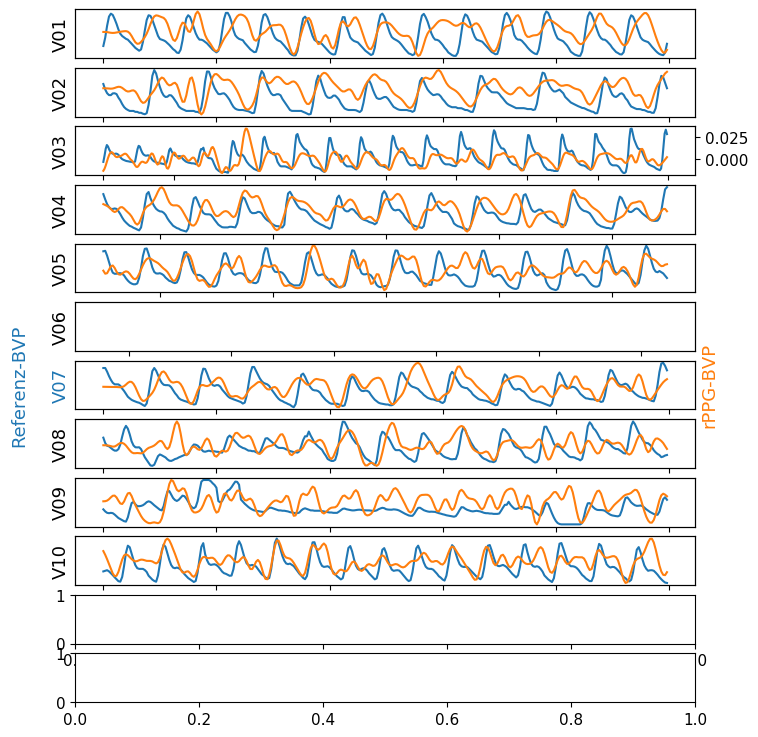

In [10]:
# Processed dataset path, need to be updated to specified path in unsupervised_methods/unsupervised_predictor.py,
# where the numpy arrays of time, GT BVP and predicted BVP get saved
video_file = "/home/rohr/data_cache/rppg_toolbox/preprocessed/cinc24/KISMED/KISMED_SzW72_SzH72_ClipLen180_DataTypeRaw_DataAugNone_LabelTypeRaw_ROI_segmeTrue_Angle_thres30_Interp_AngleTrue_ROI_mode-optimal_roi_Use_convex_hullTrue_Constr_roiFalse_Outs_roiTrue_unsupervised"
_ = 9
idx = 0
i = 0
method_name = "CHROM"

font_size = 18
# set the font to Charter
font = {'family': 'serif', 'serif': ['Charter'], 'size': font_size}
plt.rc('font', **font)
# plt.rc('xtick', labelsize=font_size)
# plt.rc('ytick', labelsize=font_size)

SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax1 = plt.subplots(12)
fig.set_figheight(9)
fig.set_figwidth(8)

for _ in range(12):
    start_frame = 0

    if _ == 2:
        start_frame = 8*30

    if _ == 3 or _ == 4:
        start_frame = 450
    elif _ == 5:
        start_frame = 900
    elif _ == 9:
        start_frame = 300 # 900
    elif _ == 11:
        start_frame = 900


    end_time = start_frame + 300
    if _ == 2:
        end_time = 24*30

    time = np.load(f'{video_file}/time_{_}_{idx}_{i}.npy')[start_frame:end_time]
    ground_truth = np.load(f'{video_file}/ground_truth_{_}_{idx}_{i}.npy')[start_frame:end_time]
    BVP = np.load(f'{video_file}/{method_name}_BVP_{_}_{idx}_{i}.npy')[start_frame:end_time]

    if _ == 11:
        time = time -30

    color_gt = '#1f77b4'
    color_rppg = '#ff7f0e'

    # fig, ax1 = plt.subplots()
    ax1[_].plot(time, ground_truth, label='Referenz-BVP', color=color_gt)
    if _ < 9:
        ax1[_].set_ylabel(f"V0{_ + 1}")
    else:
        ax1[_].set_ylabel(f"V{_ + 1}")

    ax2 = ax1[_].twinx()
    ax2.plot(time, BVP, label='rPPG-BVP', color=color_rppg)

    if _ == 2:
        ax1[_].yaxis.set_tick_params(labelleft=False)
        ax1[_].set_yticks([])
        ax2.tick_params('y')  # , labelsize=11)  #, colors=color_gt)
    else:
        ax1[_].yaxis.set_tick_params(labelleft=False)
        ax2.yaxis.set_tick_params(labelright=False)
        ax1[_].set_yticks([])
        ax2.set_yticks([])

    if _ == 6:
        ax1[_].set_ylabel(f"Referenz-BVP\n\nV0{_+1}", color=color_gt)  #, fontsize=14
        ax2.set_xlabel("Zeit (s)") # , fontsize=14)
        ax2.set_ylabel("rPPG-BVP", color=color_rppg)  # , fontsize=14
    if _ == 11:
        ax1[_].set_xlabel("Zeit (s)")  # , fontsize=14)
        ax1[_].tick_params(axis='x')# , labelsize=11)
    else:
        ax1[_].xaxis.set_tick_params(labelbottom=False)

    plt.grid(False)

fig.tight_layout()
plt.subplots_adjust(left=0.11, bottom=0.06, right=0.94, top=0.99, wspace=0.20, hspace=0.15)
plt.savefig("figs/visualization_bvp.png")
plt.show()

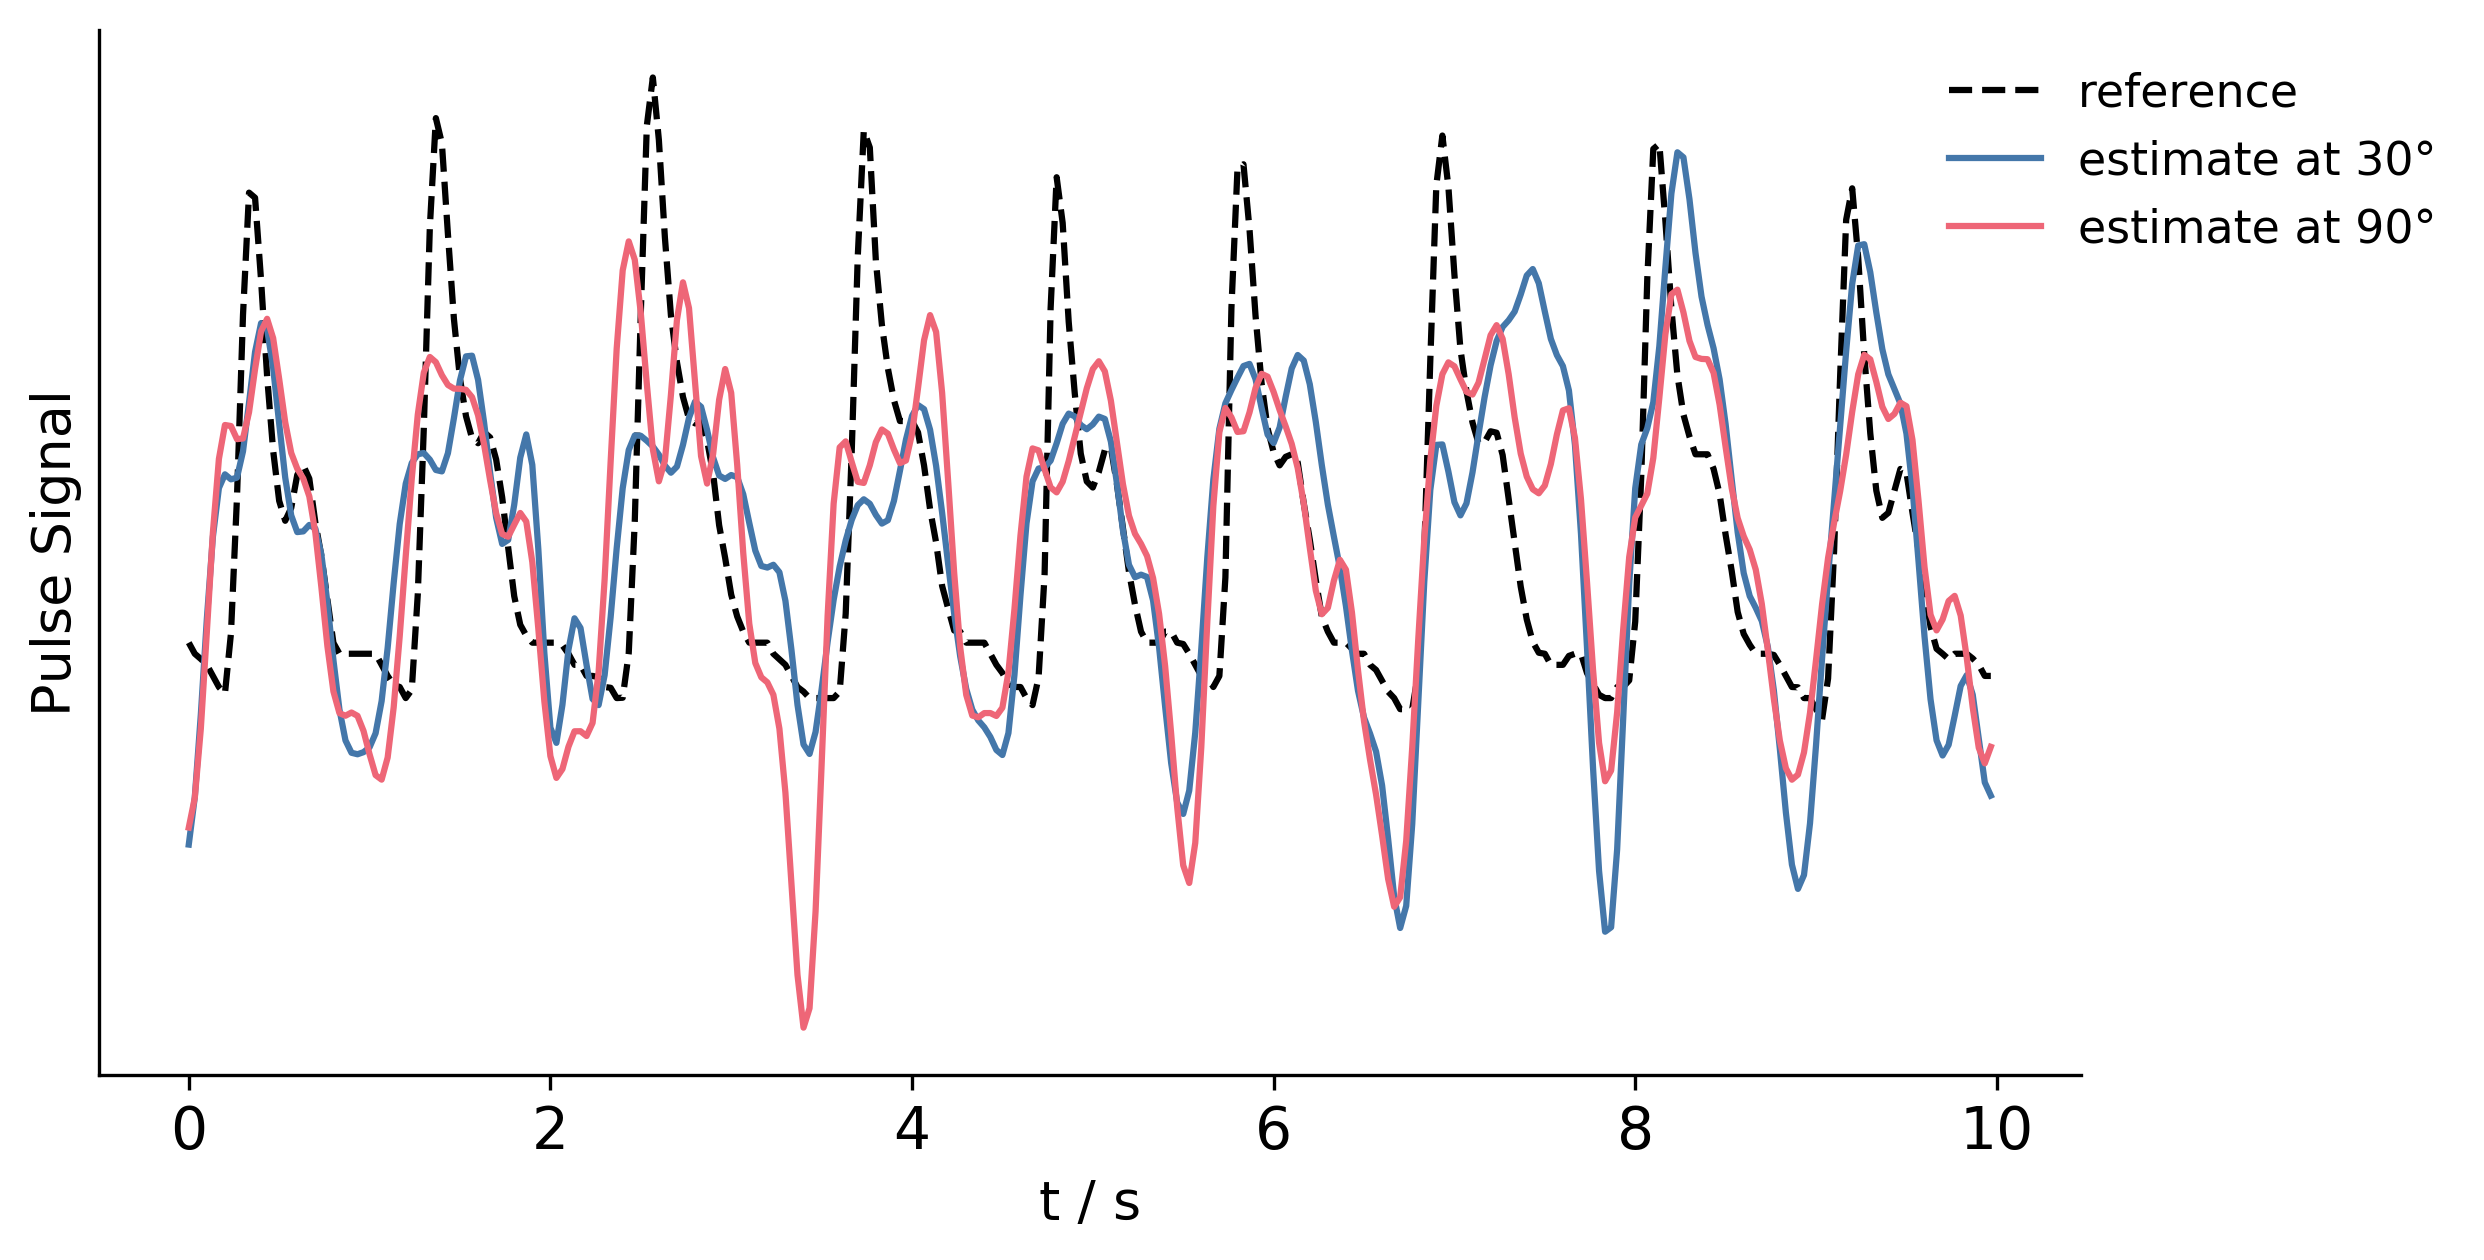

In [41]:
from tol_colors import tol_cset
plt.rc('axes', prop_cycle=plt.cycler('color', list(tol_cset('bright'))))
#fig,axs = plt.subplots(2,2,figsize=(10, 6))      
plt.rcParams['mathtext.default']='regular' 
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 300
plt.rcParams['xtick.labelsize']=14 
plt.rcParams['ytick.labelsize']=14
#plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(8.0, 4))
plt.subplots_adjust(hspace=0.5)


video_file30 = "/home/rohr/data_cache/rppg_toolbox/preprocessed/cinc24/KISMED/KISMED_SzW72_SzH72_ClipLen180_DataTypeRaw_DataAugNone_LabelTypeRaw_ROI_segmeTrue_Angle_thres30_Interp_AngleTrue_ROI_mode-optimal_roi_Use_convex_hullTrue_Constr_roiFalse_Outs_roiTrue_unsupervised"
video_file90 = "/home/rohr/data_cache/rppg_toolbox/preprocessed/cinc24/KISMED/KISMED_SzW72_SzH72_ClipLen180_DataTypeRaw_DataAugNone_LabelTypeRaw_ROI_segmeTrue_Angle_thres90_Interp_AngleTrue_ROI_mode-optimal_roi_Use_convex_hullTrue_Constr_roiFalse_Outs_roiTrue_unsupervised"

method_name = "CHROM"
subject=1
start_frame=900 #0 or 900
f0=0
dur = 30*10
time = np.load(f'{video_file}/time_{subject}_{0}_{start_frame}.npy')[f0:f0+dur]
ground_truth = np.load(f'{video_file}/ground_truth_{subject}_{0}_{start_frame}.npy')[f0:f0+dur]
BVP30 = np.load(f'{video_file30}/{method_name}_BVP_{subject}_{0}_{start_frame}.npy')[f0:f0+dur]
BVP90 = np.load(f'{video_file90}/{method_name}_BVP_{subject}_{0}_{start_frame}.npy')[f0:f0+dur]
BVP30_norm = (BVP30-BVP30.mean())/BVP30.std()
BVP90_norm = (BVP90-BVP90.mean())/BVP90.std()
ground_truth_norm = (ground_truth-ground_truth.mean())/ground_truth.std()

plt.plot(time,ground_truth_norm,color='k',linestyle="--",label="reference")
plt.plot(time,BVP30_norm,label="estimate at 30°")
plt.plot(time,BVP90_norm,label="estimate at 90°")
plt.xlabel('t / s')
plt.yticks([])
plt.ylabel("Pulse Signal")
plt.legend(loc="upper right",bbox_to_anchor = (0.2, 0, 1, 1),frameon=False)
ax =plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels,loc='center right',ncol=3,bbox_to_anchor = (5, 0, 1, 1),
#           bbox_transform = plt.gcf().transFigure)
plt.tight_layout(pad=0,rect=[0, 0, 1, 1])
plt.savefig("figs/visualization_bvp.svg")
plt.savefig("figs/visualization_bvp.png")
plt.show()